## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  46.991821   655.896778  0.096159   3.506860  0.916552
1  20.429891  1256.589181  0.783891   3.465106  1.600650
2  38.300820  1661.886210  0.567863  10.509273  1.494201
3  20.854378   295.900945  0.217434   5.555387  1.311194
4  89.673342  1677.321738  0.026568   9.344468  0.507427


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0722949	total: 57.2ms	remaining: 57.2s
1:	learn: 1.0606958	total: 57.9ms	remaining: 28.9s
2:	learn: 1.0480713	total: 58.6ms	remaining: 19.5s
3:	learn: 1.0365945	total: 59.5ms	remaining: 14.8s
4:	learn: 1.0237675	total: 60.4ms	remaining: 12s
5:	learn: 1.0127089	total: 61.2ms	remaining: 10.1s
6:	learn: 0.9999694	total: 61.9ms	remaining: 8.78s
7:	learn: 0.9858825	total: 62.7ms	remaining: 7.78s
8:	learn: 0.9734163	total: 63.5ms	remaining: 6.99s
9:	learn: 0.9651431	total: 66.8ms	remaining: 6.62s
10:	learn: 0.9558565	total: 67.4ms	remaining: 6.06s
11:	learn: 0.9465700	total: 68.3ms	remaining: 5.62s
12:	learn: 0.9379001	total: 69ms	remaining: 5.23s
13:	learn: 0.9260590	total: 69.6ms	remaining: 4.9s
14:	learn: 0.9121920	total: 70.2ms	remaining: 4.61s
15:	learn: 0.9036527	total: 70.8ms	remaining: 4.35s
16:	learn: 0.8919223	total: 71.5ms	remaining: 4.13s
17:	learn: 0.8819763	total: 72ms	remaining: 3.93s
18:	learn: 0.8732707	total: 72.7ms	remaining: 3.75s
19:	learn: 0.8635158	total: 7

176:	learn: 0.2311378	total: 160ms	remaining: 743ms
177:	learn: 0.2296877	total: 161ms	remaining: 741ms
178:	learn: 0.2279136	total: 161ms	remaining: 740ms
179:	learn: 0.2261420	total: 162ms	remaining: 737ms
180:	learn: 0.2254644	total: 162ms	remaining: 734ms
181:	learn: 0.2237138	total: 163ms	remaining: 731ms
182:	learn: 0.2225032	total: 163ms	remaining: 728ms
183:	learn: 0.2214631	total: 164ms	remaining: 726ms
184:	learn: 0.2203644	total: 165ms	remaining: 726ms
185:	learn: 0.2192536	total: 165ms	remaining: 723ms
186:	learn: 0.2178561	total: 166ms	remaining: 720ms
187:	learn: 0.2163604	total: 166ms	remaining: 717ms
188:	learn: 0.2150549	total: 166ms	remaining: 714ms
189:	learn: 0.2136889	total: 167ms	remaining: 712ms
190:	learn: 0.2122400	total: 167ms	remaining: 709ms
191:	learn: 0.2108728	total: 168ms	remaining: 706ms
192:	learn: 0.2097701	total: 168ms	remaining: 703ms
193:	learn: 0.2085096	total: 169ms	remaining: 701ms
194:	learn: 0.2072610	total: 169ms	remaining: 699ms
195:	learn: 

272:	learn: 0.1418287	total: 205ms	remaining: 546ms
273:	learn: 0.1415105	total: 205ms	remaining: 544ms
274:	learn: 0.1409044	total: 206ms	remaining: 542ms
275:	learn: 0.1402883	total: 206ms	remaining: 541ms
276:	learn: 0.1399742	total: 207ms	remaining: 539ms
277:	learn: 0.1395511	total: 207ms	remaining: 538ms
278:	learn: 0.1388437	total: 207ms	remaining: 536ms
279:	learn: 0.1383735	total: 208ms	remaining: 535ms
280:	learn: 0.1379627	total: 208ms	remaining: 533ms
281:	learn: 0.1372682	total: 211ms	remaining: 538ms
282:	learn: 0.1368972	total: 212ms	remaining: 536ms
283:	learn: 0.1363105	total: 212ms	remaining: 535ms
284:	learn: 0.1359160	total: 213ms	remaining: 533ms
285:	learn: 0.1352366	total: 213ms	remaining: 532ms
286:	learn: 0.1346688	total: 213ms	remaining: 530ms
287:	learn: 0.1342466	total: 214ms	remaining: 530ms
288:	learn: 0.1336261	total: 215ms	remaining: 528ms
289:	learn: 0.1333343	total: 215ms	remaining: 526ms
290:	learn: 0.1324362	total: 215ms	remaining: 525ms
291:	learn: 

478:	learn: 0.0597531	total: 308ms	remaining: 334ms
479:	learn: 0.0595513	total: 308ms	remaining: 334ms
480:	learn: 0.0593123	total: 309ms	remaining: 333ms
481:	learn: 0.0590451	total: 309ms	remaining: 333ms
482:	learn: 0.0587930	total: 310ms	remaining: 332ms
483:	learn: 0.0585814	total: 310ms	remaining: 331ms
484:	learn: 0.0583071	total: 311ms	remaining: 330ms
485:	learn: 0.0580618	total: 311ms	remaining: 329ms
486:	learn: 0.0578559	total: 312ms	remaining: 329ms
487:	learn: 0.0576095	total: 313ms	remaining: 328ms
488:	learn: 0.0573717	total: 313ms	remaining: 327ms
489:	learn: 0.0571696	total: 314ms	remaining: 326ms
490:	learn: 0.0569300	total: 314ms	remaining: 325ms
491:	learn: 0.0566994	total: 314ms	remaining: 324ms
492:	learn: 0.0564399	total: 315ms	remaining: 324ms
493:	learn: 0.0562083	total: 315ms	remaining: 323ms
494:	learn: 0.0559528	total: 315ms	remaining: 322ms
495:	learn: 0.0557363	total: 316ms	remaining: 321ms
496:	learn: 0.0554158	total: 316ms	remaining: 320ms
497:	learn: 

593:	learn: 0.0400519	total: 358ms	remaining: 245ms
594:	learn: 0.0398476	total: 359ms	remaining: 244ms
595:	learn: 0.0396908	total: 359ms	remaining: 244ms
596:	learn: 0.0395141	total: 360ms	remaining: 243ms
597:	learn: 0.0393917	total: 360ms	remaining: 242ms
598:	learn: 0.0391928	total: 361ms	remaining: 241ms
599:	learn: 0.0390199	total: 361ms	remaining: 241ms
600:	learn: 0.0388497	total: 362ms	remaining: 240ms
601:	learn: 0.0387709	total: 362ms	remaining: 239ms
602:	learn: 0.0386009	total: 362ms	remaining: 239ms
603:	learn: 0.0384350	total: 363ms	remaining: 238ms
604:	learn: 0.0383536	total: 364ms	remaining: 237ms
605:	learn: 0.0381885	total: 364ms	remaining: 237ms
606:	learn: 0.0380268	total: 364ms	remaining: 236ms
607:	learn: 0.0378662	total: 365ms	remaining: 235ms
608:	learn: 0.0377049	total: 365ms	remaining: 234ms
609:	learn: 0.0376249	total: 366ms	remaining: 234ms
610:	learn: 0.0374636	total: 366ms	remaining: 233ms
611:	learn: 0.0373231	total: 366ms	remaining: 232ms
612:	learn: 

827:	learn: 0.0215704	total: 464ms	remaining: 96.3ms
828:	learn: 0.0215483	total: 465ms	remaining: 95.8ms
829:	learn: 0.0215296	total: 465ms	remaining: 95.3ms
830:	learn: 0.0215078	total: 466ms	remaining: 94.7ms
831:	learn: 0.0214108	total: 467ms	remaining: 94.2ms
832:	learn: 0.0213157	total: 467ms	remaining: 93.7ms
833:	learn: 0.0212942	total: 468ms	remaining: 93.1ms
834:	learn: 0.0212112	total: 468ms	remaining: 92.5ms
835:	learn: 0.0211898	total: 469ms	remaining: 92ms
836:	learn: 0.0211688	total: 469ms	remaining: 91.4ms
837:	learn: 0.0211116	total: 470ms	remaining: 90.8ms
838:	learn: 0.0210930	total: 470ms	remaining: 90.2ms
839:	learn: 0.0210747	total: 471ms	remaining: 89.6ms
840:	learn: 0.0209826	total: 471ms	remaining: 89.1ms
841:	learn: 0.0208827	total: 472ms	remaining: 88.5ms
842:	learn: 0.0208621	total: 472ms	remaining: 87.9ms
843:	learn: 0.0208417	total: 472ms	remaining: 87.3ms
844:	learn: 0.0208235	total: 473ms	remaining: 86.7ms
845:	learn: 0.0207683	total: 473ms	remaining: 86

895:	learn: 0.0187331	total: 503ms	remaining: 58.4ms
896:	learn: 0.0187158	total: 504ms	remaining: 57.8ms
897:	learn: 0.0186893	total: 504ms	remaining: 57.3ms
898:	learn: 0.0186033	total: 505ms	remaining: 56.7ms
899:	learn: 0.0185173	total: 505ms	remaining: 56.1ms
900:	learn: 0.0185004	total: 506ms	remaining: 55.6ms
901:	learn: 0.0184361	total: 506ms	remaining: 55ms
902:	learn: 0.0184196	total: 507ms	remaining: 54.4ms
903:	learn: 0.0184034	total: 507ms	remaining: 53.8ms
904:	learn: 0.0183201	total: 507ms	remaining: 53.3ms
905:	learn: 0.0182575	total: 508ms	remaining: 52.7ms
906:	learn: 0.0182418	total: 508ms	remaining: 52.1ms
907:	learn: 0.0182262	total: 509ms	remaining: 51.5ms
908:	learn: 0.0181708	total: 509ms	remaining: 51ms
909:	learn: 0.0181434	total: 510ms	remaining: 50.4ms
910:	learn: 0.0180576	total: 510ms	remaining: 49.8ms
911:	learn: 0.0179767	total: 511ms	remaining: 49.3ms
912:	learn: 0.0179223	total: 511ms	remaining: 48.7ms
913:	learn: 0.0179073	total: 512ms	remaining: 48.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.31679846907674636


ABC Pre-generator MAE 0.3170697150409757


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

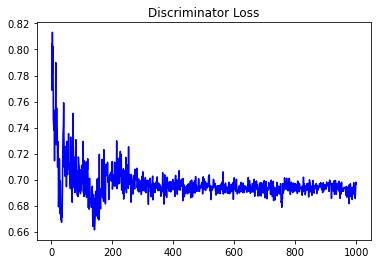

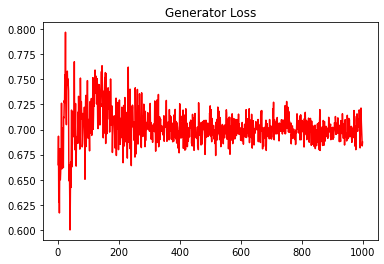

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.31811777364928273


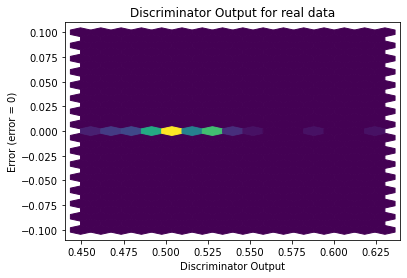

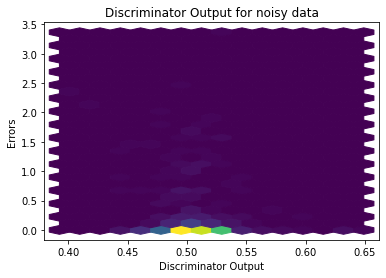

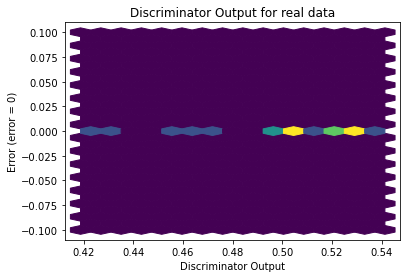

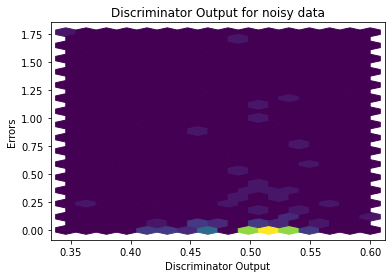

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

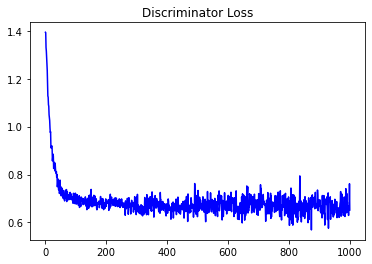

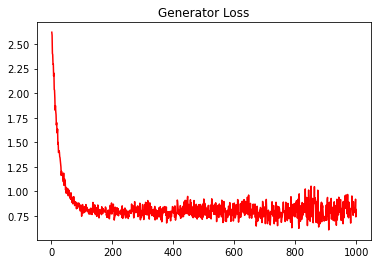

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.1178074487773701


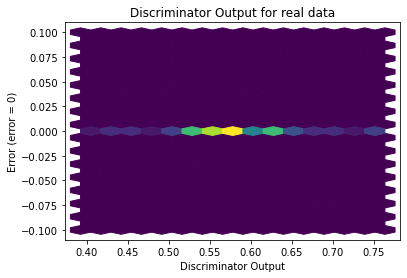

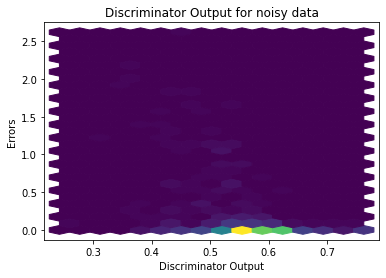

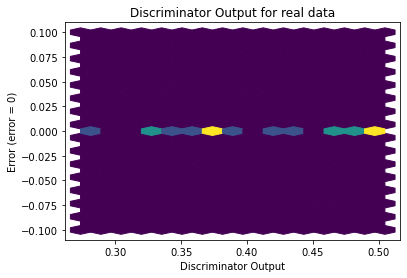

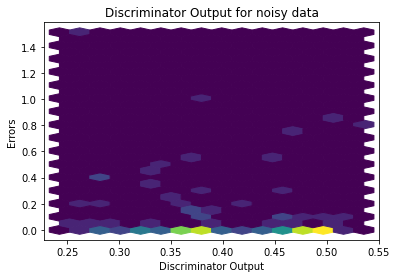

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


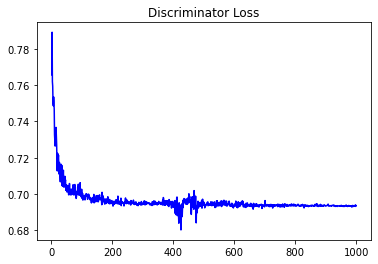

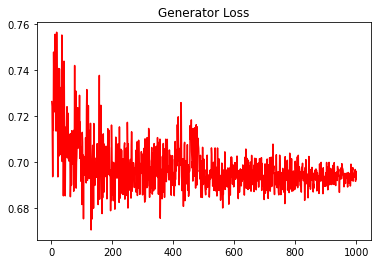

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.30363695371244104


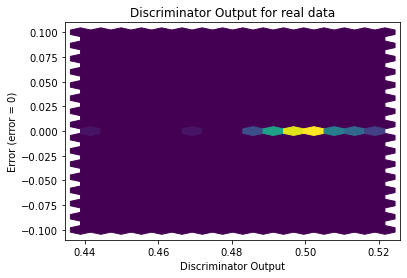

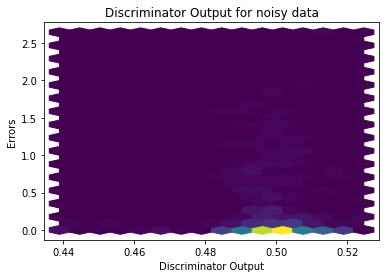

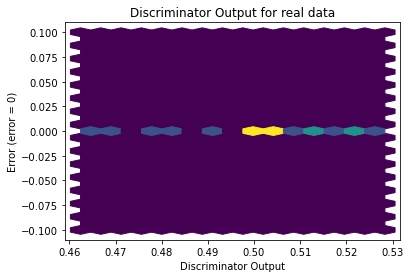

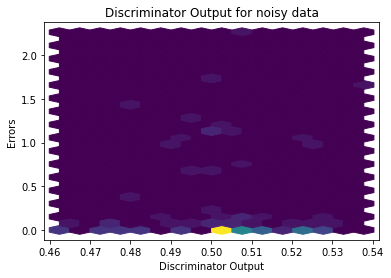

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


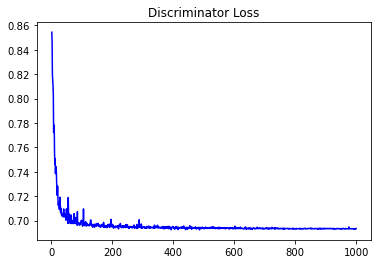

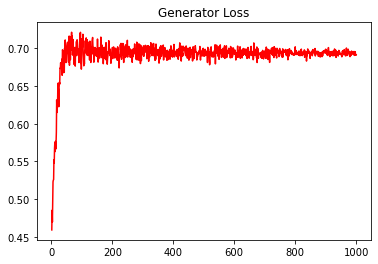

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3146788739049807


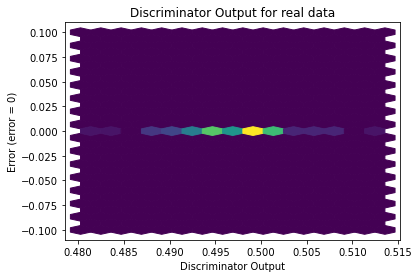

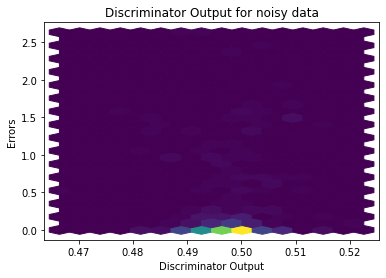

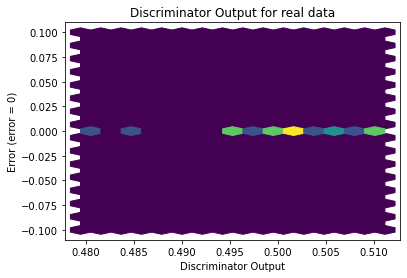

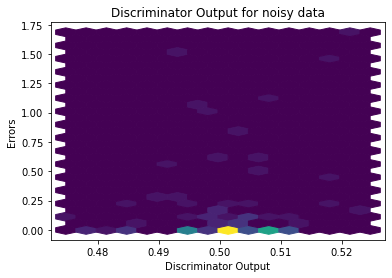

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0669]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0068]], requires_grad=True)
